
Confusion Matrix:
[[41  1]
 [ 1 71]]

Precision: 0.99
Recall: 0.99
ROC-AUC Score: 1.00

Adjusted Precision (Threshold=0.6): 0.99
Adjusted Recall (Threshold=0.6): 0.94


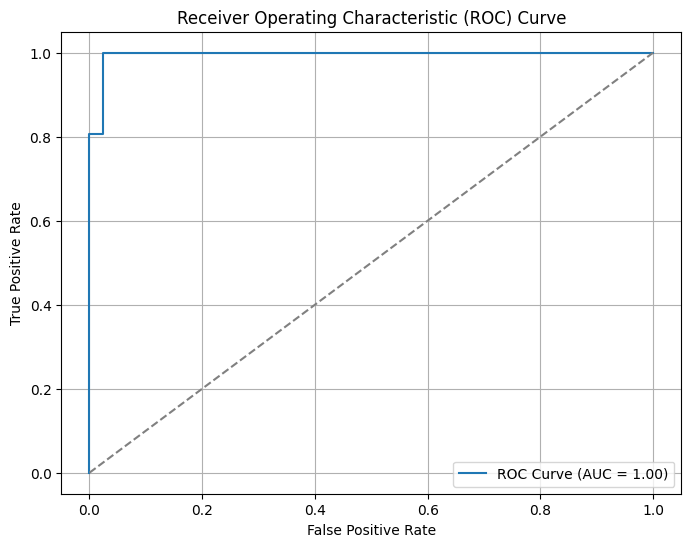

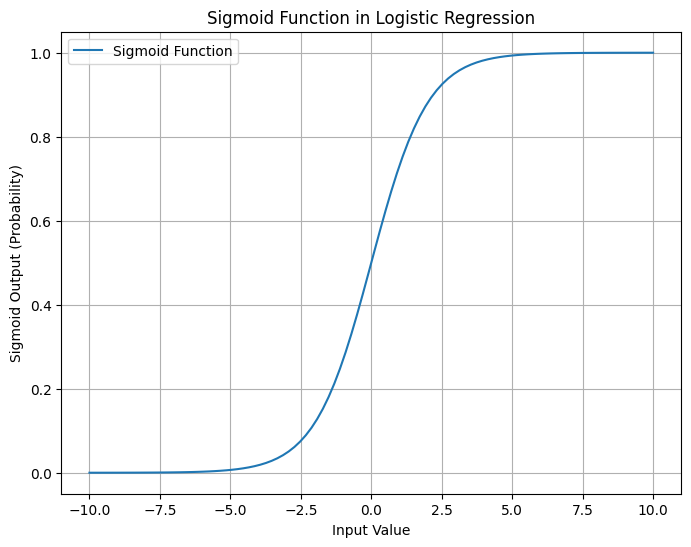

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve

# Step 1: Load Binary Classification Dataset
data = load_breast_cancer()  # Scikit-Learn built-in dataset
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target  # Binary classification (0 = benign, 1 = malignant)

# Step 2: Train/Test Split and Standardize Features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Fit a Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Step 4: Evaluate Model with Metrics
y_pred = log_reg.predict(X_test_scaled)
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]  # Probabilities for ROC-AUC

conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"\nConfusion Matrix:\n{conf_matrix}")
print(f"\nPrecision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")

# Step 5: Tune Threshold & Explain Sigmoid Function
threshold = 0.6  # Adjust threshold (default is 0.5)
y_pred_adjusted = (y_prob >= threshold).astype(int)

precision_adj = precision_score(y_test, y_pred_adjusted)
recall_adj = recall_score(y_test, y_pred_adjusted)

print(f"\nAdjusted Precision (Threshold={threshold}): {precision_adj:.2f}")
print(f"Adjusted Recall (Threshold={threshold}): {recall_adj:.2f}")

# Step 6: Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.grid()
plt.show()

# Step 7: Plot Sigmoid Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x_values = np.linspace(-10, 10, 100)
y_values = sigmoid(x_values)

plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label="Sigmoid Function")
plt.xlabel("Input Value")
plt.ylabel("Sigmoid Output (Probability)")
plt.title("Sigmoid Function in Logistic Regression")
plt.legend()
plt.grid()
plt.show()